## Intro to Data Visualization: HW2 
### Chicago Crimes in 2012

*Submitted by Kristen Guy*

#### Abstract
*This report investigates crime data from Chicago in 2012, merged with additional community area data. The exploration aims to examine common assumptions about the assocation between community area attributes and the frequency and types of crimes that occur in them. *

#### Introduction
Chicago has been a leader in a national movement towards Open Data, which aims to make government data publicly available for transparency and accountability. The city of Chicago has developed a highly versatile website that gives access to a plethora of information.

In this report, I will be exploring a dataset put together by Heather Steich which combines information from several areas on Chicago's open data site. Specifically, crime records from 2012 have been merged with community area information for the area in which the crime took place, along with weather and transit ride density for the day the crime took place.

#### Hypothesis
My curiosity in this dataset lay with relationship between crimes and the community areas in which they occured. There are so many stereotypes about crime, and which areas are "safe" vs. "sketchy". While this set of data only captures a small moment in time in the grand scheme of things, it affords an excellent platofrm for exploring the validity of some of those stereotypes and common assumptions.  I'm particularly interested in finding out whether the following assumptions hold true for Chicago in 2012:

* Low income areas are less safe
* Areas with a higher propertion of people with lower education is highly associated with crime

These are assumptinos I have both heard from many others, and held myself. I suspect this dataset will challenge some of them enough to question whether those assumptions are sound.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Steich_HW1_DataSet.csv')

C:\Users\kguy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Description of the Data

In [3]:
print('Shape of the dataset: ', np.shape(df)[0], ' observations, each with ', np.shape(df)[1], 'attributes.')
print('Observations recorded from ', df.Date.min(), ' - ', df.Date.max())

Shape of the dataset:  297978  observations, each with  36 attributes.
Observations recorded from  2012-01-01  -  2012-12-31



We have a large number of observations, coming in at just under 300k.  The snippet below gives a sense of how the dataset is laid out. Each observation is based primarly on an incident ID, which has been recorded along with the date, type of crime, location details, arrest details, and the area in which it ocurred. Crimes of multple types and location can occur on the same day.  

Community area data has then been merged for greater detail, but is is important to note that community area repeats across observations. The final sets of attributes include weather and transit ride density on the day in question (both of which repeat for observations that occur on the same day).

In [4]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',30)
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.head(2)

,ID,Date,Day of Week,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,Community Area,CA Name,Area Prop Housing Crowded,Area Prop Households Below Poverty,Area Prop Age>16 Unemployed,Area Prop Age>25 w/o HS Diploma,Area Prop Age<18 or Age>64,Area Per Capita Income,Hardship Index,CST,Max TempF,Min TempF,Max Dew PtF,Min DewPtF,Max Humidity,Min Humidity,Max Sea Lvl PresIn,Min Sea Lvl PresIn,Max Visibility Miles,Min Visibility Miles,Max Wind MPH,PrecipIn,Cloud Cover,Events,Public Transit Rides
0,8421479,2012-01-01,Sunday,BATTERY,SIMPLE,STREET,0,0,41.814873,-87.688296,58.0,Brighton Park,0.144,0.236,0.139,0.451,0.393,13089.0,84.0,2012-01-01,44,29,36,16,85,56,30.07,29.52,10,2,33,0.04,7,Rain-Snow,227947
1,8421469,2012-01-01,Sunday,BATTERY,SIMPLE,HOTEL/MOTEL,1,0,41.872709,-87.624188,32.0,Loop,0.015,0.147,0.057,0.031,0.135,65526.0,3.0,2012-01-01,44,29,36,16,85,56,30.07,29.52,10,2,33,0.04,7,Rain-Snow,227947


Below I've run a "describe" function on the full dataset, which can be a useful reference for looking at various statistics on the numeric attributes of the dataset as we move through it. 

In [5]:
dfstats = df.describe()
dfstats

,ID,Arrest,Domestic,Latitude,Longitude,Community Area,Area Prop Housing Crowded,Area Prop Households Below Poverty,Area Prop Age>16 Unemployed,Area Prop Age>25 w/o HS Diploma,Area Prop Age<18 or Age>64,Area Per Capita Income,Hardship Index,Max TempF,Min TempF,Max Dew PtF,Min DewPtF,Max Humidity,Min Humidity,Max Sea Lvl PresIn,Min Sea Lvl PresIn,Max Visibility Miles,Min Visibility Miles,Max Wind MPH,Cloud Cover,Public Transit Rides
count,2.979780e+05,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297972.000000,297972.000000,297972.000000,297972.000000,297972.000000,297972.000000,297972.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000,297978.000000
mean,8.678523e+06,0.278729,0.134627,41.840668,-87.671672,37.622331,0.053395,0.248496,0.169801,0.208815,0.350027,25591.659183,54.384687,65.605249,46.520015,48.456940,36.933800,82.933462,44.849150,30.085469,29.895010,9.963175,7.285071,19.984318,4.573032,523703.684779
std,3.885738e+05,0.448374,0.341326,0.095062,0.066271,21.537942,0.037475,0.103350,0.078023,0.114921,0.081013,18487.193116,29.947731,20.078256,16.922914,15.623278,16.068406,11.003858,15.469788,0.177981,0.196432,0.298862,3.485133,6.554967,2.316181,136583.125918
min,2.022400e+04,0.000000,0.000000,36.619446,-91.686566,0.000000,0.003000,0.033000,0.047000,0.025000,0.135000,8201.000000,1.000000,19.000000,5.000000,2.000000,-12.000000,50.000000,17.000000,29.510000,29.020000,6.000000,0.000000,8.000000,0.000000,117664.000000
25%,8.560298e+06,0.000000,0.000000,41.767577,-87.714577,23.000000,0.028000,0.154000,0.096000,0.137000,0.310000,13781.000000,28.000000,49.000000,33.000000,35.000000,25.000000,75.000000,32.000000,29.960000,29.790000,10.000000,4.000000,15.000000,3.000000,401969.000000
50%,8.691740e+06,0.000000,0.000000,41.855493,-87.666005,32.000000,0.040000,0.259000,0.173000,0.193000,0.380000,17949.000000,60.000000,67.000000,47.000000,50.000000,37.000000,85.000000,42.000000,30.070000,29.900000,10.000000,10.000000,18.000000,5.000000,593188.000000
75%,8.824042e+06,1.000000,0.000000,41.906240,-87.628211,58.000000,0.074000,0.307000,0.226000,0.275000,0.410000,27249.000000,80.000000,83.000000,61.000000,62.000000,50.000000,92.000000,56.000000,30.200000,30.010000,10.000000,10.000000,24.000000,7.000000,618377.000000
max,9.541266e+06,1.000000,1.000000,42.022586,-87.524529,77.000000,0.158000,0.565000,0.359000,0.548000,0.515000,88669.000000,98.000000,103.000000,82.000000,77.000000,68.000000,100.000000,87.000000,30.560000,30.460000,10.000000,10.000000,43.000000,8.000000,681469.000000


#### Exploratory Visualizations
The first thing I want to do is get a sense of how this data is moving. Because one of my biggest assumptions is regarding the relationship between frequency of crime and the income level of the area in which it occurs, I'll start with a distribution plot that focuses on that variable.

In [6]:
%matplotlib inline
sns.set()
sns.set_context('poster')
sns.set_style('darkgrid')
sns.mpl.rc("figure", figsize=(14,8))

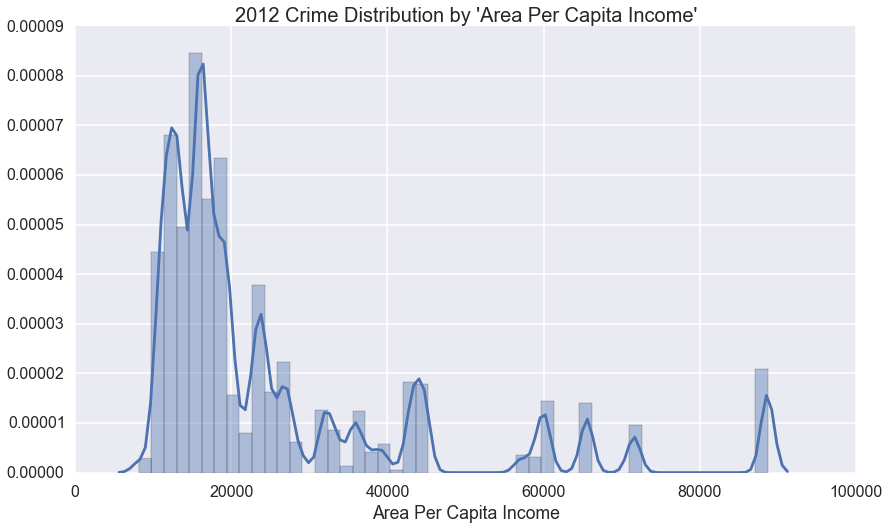

In [7]:
CD = sns.distplot(df['Area Per Capita Income'].dropna(), bins = 50)
plt.title("2012 Crime Distribution by 'Area Per Capita Income'", fontsize= 20)
plt.show();

The data indicate that most crime happens in the lower income areas, with  few interesting spikes in the middle and upper ranges. Before taking that distribution at face value though, we need to consider the fact that while this tells us the distribution of income as it relates to frequency of crimes in those areas, it does so without giving us a baseline for whta that distribution looks like without the crime frequncy involved. To evaluate this, we'll overlay the same plot with standard information from the Chicago census 2008-2012 summary, which is the datafile that was originally rolled into our crime dataset.

In [6]:
cc = pd.read_csv('ChicagoCensus2008_2012.csv')
print('Chicago Census Data, 2008-2012 Summary:')
cc.head(3)

Chicago Census Data, 2008-2012 Summary:


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0


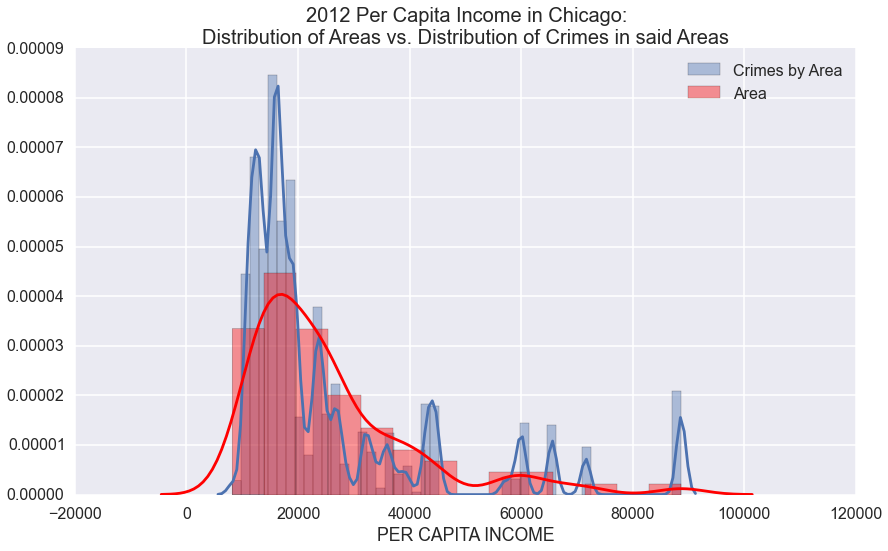

In [9]:
sns.distplot(df['Area Per Capita Income'].dropna(), label = 'Crimes by Area')
sns.distplot(cc['PER CAPITA INCOME '], color = 'r', label= 'Area')

plt.title("2012 Per Capita Income in Chicago:\nDistribution of Areas vs. Distribution of Crimes in said Areas", fontsize= 20)
plt.legend();

That overlay certainly seems to support the idea that as compared to the frequncy of the areas, the crimes in those areas is shifted much more heavily towards the lower income spectrum. 

What would be more useful though is to get a sense of where the median and inner quartile ranges lay for both the crime frequency and popultion frequency. Additionally, we would be remiss if we didn't investigate the other community area attributes in this way. While I anticipate that income will yield the strongest disparity between the two datasets, I am curious to discover whether than assumption is misinformed. What if other elements such as unemployment, poverty, crowded housing, high school dropouts, number of children and seniors, or overall hardship index play a bigger role? 

To investigate, I've plotted each of these seven community features and their frequency of appearance in the table (which indicates the distribution of crimes commited in areas with that feature), and overlaid each plot with the median and inner quartile range (IQR) of the crime distribution data as well as a separate median and IQR for the distribution of that feature seen in the area when not distorted by crime frequency.

Below, I've created another statistical description object this time of the community area dataset which can be referenced when plotting the data.

In [10]:
ccstats = cc.describe()

In [11]:
CD = sns.distplot(df['Area Per Capita Income'].dropna(), bins = 50, label = 'Crime Distribution')

plt.axvline(x=dfstats.ix[4:5,'Area Per Capita Income'][0], ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Area Per Capita Income'][0], ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Area Per Capita Income'][0], ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'PER CAPITA INCOME '][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'PER CAPITA INCOME '][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'PER CAPITA INCOME '][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--',)

plt.title("Per Captia Income:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)
sns.despine()
plt.show;

C:\Users\kguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Here is our "per capita income" plot again, this time overlaid with the area population quartiles. Note how much easier it is to see the difference between the medians (solid lines), and yet how similar the inner quartile range appears to be.

In [13]:
CD = sns.distplot(df['Area Prop Households Below Poverty'].dropna()*100, bins = 50, label = 'Crime Distribution')

plt.axvline(x=dfstats.ix[4:5,'Area Prop Households Below Poverty'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Area Prop Households Below Poverty'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Area Prop Households Below Poverty'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'PERCENT HOUSEHOLDS BELOW POVERTY'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'PERCENT HOUSEHOLDS BELOW POVERTY'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'PERCENT HOUSEHOLDS BELOW POVERTY'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--',)

plt.title("% Households Below Povery:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)
sns.despine()
plt.show;

Poverty appears to have an even greater difference between the two sets of data, with the medians offset by a fair margin.

In [14]:
CD = sns.distplot(df['Area Prop Age>16 Unemployed'].dropna()*100, bins = 50, label = 'Crime Distribution')

plt.axvline(x=dfstats.ix[4:5,'Area Prop Age>16 Unemployed'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Area Prop Age>16 Unemployed'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Area Prop Age>16 Unemployed'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'PERCENT AGED 16+ UNEMPLOYED'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'PERCENT AGED 16+ UNEMPLOYED'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'PERCENT AGED 16+ UNEMPLOYED'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--',)

plt.title("% Adult Unemployment:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)
sns.despine()
plt.show;

Another potentially strong association.

In [15]:
CD = sns.distplot(df['Area Prop Housing Crowded'].dropna()*100, bins = 1000, label = 'Crime Distribution')

plt.axvline(x=dfstats.ix[4:5,'Area Prop Housing Crowded'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Area Prop Housing Crowded'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Area Prop Housing Crowded'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'PERCENT OF HOUSING CROWDED'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'PERCENT OF HOUSING CROWDED'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'PERCENT OF HOUSING CROWDED'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--',)

plt.title("% Crowded Housing:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)
sns.despine()
plt.show;

This distribution is so clustered the information had to be split into 100 bins instead of 50 just to be able to see it. As shown above, the median lines for crime frequency and population frequency are almost on top of each other, indicating that crowded housing is not strongly associated with a higher frequency of crime.

This dislodges one of my own personal prejudices; when I look for a place to live, one of the things I check is how much parking is available on the street, the logic being that significantly less space means significantly more people living in that area. 

In [16]:
CD = sns.distplot(df['Area Prop Age>25 w/o HS Diploma'].dropna()*100, bins = 50, label = 'Crime Distribution')

plt.axvline(x=dfstats.ix[4:5,'Area Prop Age>25 w/o HS Diploma'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Area Prop Age>25 w/o HS Diploma'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Area Prop Age>25 w/o HS Diploma'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--',)

plt.title("% Lacking High School Diploma:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)
sns.despine()
plt.show;

Surprising!  I would have thought lacking the HS school diploma would mean greater hardship, and thus higher quartiles for the crime data vs. the population data.

In [17]:
sns.set_style()

CD = sns.distplot(df['Area Prop Age<18 or Age>64'].dropna()*100, bins = 50, label = 'Crime Distribution')  #scaling to match ccstats measurements

plt.axvline(x=dfstats.ix[4:5,'Area Prop Age<18 or Age>64'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b',linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Area Prop Age<18 or Age>64'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Area Prop Age<18 or Age>64'][0]*100, ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'PERCENT AGED UNDER 18 OR OVER 64'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'PERCENT AGED UNDER 18 OR OVER 64'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'PERCENT AGED UNDER 18 OR OVER 64'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')

plt.title("Under 18 / Over 64:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)

sns.despine()
plt.show;

Again, median lines are almost on top of each other.

In [18]:
sns.set_style()

CD = sns.distplot(df['Hardship Index'].dropna(), bins = 50, label = 'Crime Distribution')  #scaling to match ccstats measurements

plt.axvline(x=dfstats.ix[4:5,'Hardship Index'][0], ymin=0.025, ymax=0.5, hold=None, color = 'b',linestyle= '--')
plt.axvline(x=dfstats.ix[5:6,'Hardship Index'][0], ymin=0.025, ymax=0.5, hold=None, color = 'b', label = 'Crime Quartiles')
plt.axvline(x=dfstats.ix[6:7,'Hardship Index'][0], ymin=0.025, ymax=0.5, hold=None, color = 'b', linestyle= '--')

plt.axvline(x=ccstats.ix[4:5,'HARDSHIP INDEX'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')
plt.axvline(x=ccstats.ix[5:6,'HARDSHIP INDEX'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', label = 'Population Quartiles')
plt.axvline(x=ccstats.ix[6:7,'HARDSHIP INDEX'][0], ymin=0.025, ymax=0.5, hold=None, color = 'r', linestyle= '--')

plt.title("Hardship Index:   Area Crimes vs. Area Population", fontsize= 23)
plt.legend(fontsize = 12)

sns.despine()
plt.show;

Fairly strong indicator as well.

-----------------
#### Initial Exploration Summary
So, we have 3 community features that appear to occur more frequently with crime than they do just in the area: 

* Per Capita Income
* % Adult Unemployment
* % Below Povery
* Hardship Index  

The others 4 may be interesting, but do not appear to shift significantly when looking at frequency of crime.

The next question is how strong those shifts are. In the plots above, some features may seem more widely spaced apart than others, but one has to keep in mind that each feature is measured on a slightly different scale. Another way to look at the differences between is to investigate the percent change of the medians and IQRs.

In [19]:
dfstats2 = pd.DataFrame.copy(dfstats)
dfstats2 = dfstats2.ix[4:7,6:13]
dfstats2.ix[:,0:5] = dfstats2.ix[:,0:5]*100

C:\Users\kguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\kguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
ccstats2 = ccstats.ix[4:7,1:13]

In [21]:
PC = pd.DataFrame(index=ccstats2.index.values, columns=ccstats2.columns.values)
PC = PC.fillna(0)

for i in range(np.shape(ccstats2)[1]):
    PC.iloc[:,i] = ((dfstats2.iloc[:,i]-ccstats2.iloc[:,i])/ccstats2.iloc[:,i])
PC.transpose().sort_values('50%', ascending=False)                                    

,25%,50%,75%
PERCENT HOUSEHOLDS BELOW POVERTY,0.153558,0.359580,0.053173
PERCENT AGED 16+ UNEMPLOYED,0.043478,0.249097,0.130000
HARDSHIP INDEX,0.120000,0.200000,0.081081
PERCENT OF HOUSING CROWDED,0.204301,0.038961,0.088235
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,0.134576,0.034853,0.033835
PERCENT AGED UNDER 18 OR OVER 64,-0.035770,-0.001314,0.012346
PER CAPITA INCOME,-0.128047,-0.171655,-0.051078


The table above supports the conclusions we were able to make from the charts, and gives us a confirmed order in which the various community features are more likely associated with a higher frequency of crime.  As shown here, my expectation of Per Capita Income actually appears to be at the bottom of the list. Households below poverty at the forefront, and is along the same lines of my oritinal thinking: Communities with fewer monetary resources saw a higher incidence of crime.

One of the benefits of plotting the distritubtions and quartiles rather than simply running this one table is the extra information those distrubutions afford. For example, looking at this table doesn't demonstrate the interesting spikes of crime frequncy at certain intervals along the "middle class" area of per capita income chart when comparing the population distribution to the crime distribution. Nor does it evoke the visceral sense of how just how much more overrepresented some of these features are when laid over a backdrop of crime distribution.

---------------
#### Alternate Distribution: The Violin Plot
Now that we know the strong differences in population vs. crime frequency for some of these attributes, it would be interesting to further explore how they interact along some of the other variables. This is made somewhat challeging by the orientation of our dataset; by having so many categories of areas, crimes, and locations, it becomes difficult to show distributions by alternate categories. One way around that is to bin certain sets of data into summaries of common themes. Below, I've grouped the myriad of crime types into 4 categories: Contraband, People, Property, and Public Disturbace/Other.

In [24]:
## Adding in a column of ones to make gather counts easier.
df['ones_col'] = np.ones((np.shape(df)[0],1),dtype='int32')

People = ['BATTERY', 'CRIM SEXUAL ASSAULT', 'ASSAULT', 'HOMICIDE', 'STALKING', 'INTIMIDATION', 'KIDNAPPING', \
         'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'DECEPTIVE PRACTICE']
Property =  ['CRIMINAL DAMAGE', 'ARSON', 'CRIMINAL TRESPASS', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT', 'ROBBERY']
Contraband = ['NARCOTICS', 'LIQUOR LAW VIOLATION', 'GAMBLING', 'PROSTITUTION', 'WEAPONS VIOLATION']
PubDisturbOth = ['PUBLIC PEACE VIOLATION', 'OBSCENITY', 'PUBLIC INDECENCY', 'INTERFERENCE WITH PUBLIC OFFICER','NON-CRIMINAL', 
                 'NON-CRIMINAL (SUBJECT SPECIFIED)']

df['Crime_Cat'] = ''
df.ix[df[df['Primary Type'].isin(People)].index,'Crime_Cat'] = 'Person'
df.ix[df[df['Primary Type'].isin(Property)].index,'Crime_Cat'] = 'Property'
df.ix[df[df['Primary Type'].isin(Contraband)].index,'Crime_Cat'] = 'Contraband'
df.ix[df[df['Primary Type'].isin(PubDisturbOth)].index,'Crime_Cat'] = 'Public Disturbance'

pd.DataFrame(df.groupby('Crime_Cat')['ones_col'].count())

,ones_col
Crime_Cat,
Contraband,41672
Person,88256
Property,163977
Public Disturbance,4073


Now that we have those categories to pull from as a column in the datset, we can set up a violin plot to see how those categories work across our variable that differs the most from the population: Households below the poverty line.

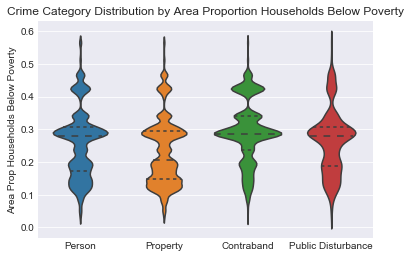

In [25]:
sns.set_style('darkgrid')
g = sns.violinplot(x='Crime_Cat', y = 'Area Prop Households Below Poverty', data = df, inner="quartile")
#g = sns.stripplot(x='Crime_Cat', y = 'Area Prop Households Below Poverty', data = df, jitter=0.04, c = 'w', alpha = 0.5)
g.get_xaxis().set_label_text('')
plt.legend()
plt.title('Crime Category Distribution by Area Proportion Households Below Poverty')
plt.show();

The plot implies that crimes agains people, crimes related to contraband, and issues with public disturbance are the categories most frequently seen in areas with higher proportions of housing below the poverty line, with the majority of the data fallin around 0.3%. While this is interesting, it doesn't necessarily tell us how this fits into the whole picture. We need to take a bigger step back, and consider more variables, and rearrange the data so that we aren't dealing with this odd distribution distortion of "population of areas with an attribute, vs. number of times crimes occur within a population with that attribute". 

#### A Wider View
What I'd really like to get a better sense of is what kinds of locations crimes are happening in, and how that interacts with the type of crime, and what community areas appear to be more susceptible to those. 

In order to properly do this, we'll need to condense another attribute into bins: the location description.

In [26]:
# Binning DF locations

df['LocDesc_Cat'] = ''

df.ix[df[df['Location Description'].str.startswith('AIR')].index,'LocDesc_Cat'] = 'Transit/Travel'
trans = ['CTA TRAIN', 'CTA BUS', 'CTA PLATFORM', 'TAXI CAB', 'CTA BUS STOP', 'TAXICAB', 'VEHICLE-COMMERCIAL', 'AUTO',
         'VEHICLE NON-COMMERCIAL', 'DELIVERY TRUCK','HIGHWAY/EXPRESSWAY', 'GAS STATION', 'GAS STATION DRIVE/PROP.',
        'BOAT/WATERCRAFT']
df.ix[df[df['Location Description'].isin(trans)].index,'LocDesc_Cat'] = 'Transit/Travel'

df.ix[df[df['Location Description'].str.contains('SCHOOL')].index,'LocDesc_Cat'] = 'Govnt/Community'
df.ix[df[df['Location Description'].str.contains('COLLEGE')].index,'LocDesc_Cat'] = 'Govnt/Community'
com = ['CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'CHURCH PROPERTY','SPORTS ARENA/STADIUM','HOSPITAL BUILDING/GROUNDS', 
       'DAY CARE CENTER','POLICE FACILITY/VEH PARKING LOT', 'FEDERAL BUILDING','LIBRARY', 'GOVERNMENT BUILDING/PROPERTY', 
       'FIRE STATION', 'JAIL / LOCK-UP FACILITY', 'CEMETARY', 'YARD', 'BRIDGE']
df.ix[df[df['Location Description'].isin(com)].index,'LocDesc_Cat'] = 'Govnt/Community'

res = ['RESIDENCE', 'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'RESIDENTIAL YARD (FRONT/BACK)', 'PORCH',
       'DRIVEWAY - RESIDENTIAL', 'APARTMENT', 'HOUSE', 'CHA APARTMENT', 'NURSING HOME/RETIREMENT HOME', 
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'HOTEL/MOTEL', 'HOTEL']
df.ix[df[df['Location Description'].isin(res)].index,'LocDesc_Cat'] = 'Residence/Hotel'

store = ['CONVENIENCE STORE', 'DRUG STORE', 'DEPARTMENT STORE',  'SMALL RETAIL STORE', 'APPLIANCE STORE', 'RETAIL STORE',
        'BARBER SHOP/BEAUTY SALON','COMMERCIAL / BUSINESS OFFICE', 'PAWN SHOP',  'FACTORY/MANUFACTURING BUILDING', 'BANK',
         'GROCERY FOOD STORE', 'BOWLING ALLEY', 'MOVIE HOUSE/THEATER','MEDICAL/DENTAL OFFICE','RESTAURANT', 'LIQUOR STORE',
        'BARBERSHOP', 'SAVINGS AND LOAN', 'CURRENCY EXCHANGE',  'TAVERN/LIQUOR STORE', 'BAR OR TAVERN', 'POOL ROOM', 
         'CLEANING STORE', 'ANIMAL HOSPITAL', 'WAREHOUSE','CREDIT UNION','NEWSSTAND','ATHLETIC CLUB',
         'ATM (AUTOMATIC TELLER MACHINE)', 'CAR WASH', 'CONSTRUCTION SITE', 'VESTIBULE', 'COIN OPERATED MACHINE', 'HALLWAY',
        'BASEMENT']
df.ix[df[df['Location Description'].isin(store)].index,'LocDesc_Cat'] = 'Business'

public = ['STREET', 'SIDEWALK', 'PARK PROPERTY', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'ALLEY', 'FOREST PRESERVE','GANGWAY',]
df.ix[df[df['Location Description'].isin(public)].index,'LocDesc_Cat'] = 'Public/Pedestrian'

lot = ['PARKING LOT/GARAGE(NON.RESID.)', 'CHA PARKING LOT/GROUNDS', 'PARKING LOT', 'CHA PARKING LOT', 'VACANT LOT/LAND', 
       'GARAGE', 'VACANT LOT', 'ABANDONED BUILDING']
df.ix[df[df['Location Description'].isin(lot)].index,'LocDesc_Cat'] = 'Lot/Parking Area'


pd.DataFrame(df.groupby('LocDesc_Cat')['ones_col'].count())

,ones_col
LocDesc_Cat,
Business,30538
Govnt/Community,12516
Lot/Parking Area,13117
Public/Pedestrian,121204
Residence/Hotel,103921
Transit/Travel,16682


First, let's just take a look and see if we can gain any insights from the binning of those two attributes.  Below is a table that lays out the totals, and the interactions between the two features. 

In [27]:
df_Loc_v_Crime = df.pivot_table(index = ['LocDesc_Cat'],
                         columns = ['Crime_Cat'],
                         values = 'ones_col',
                         aggfunc = sum)
rttl = pd.DataFrame(df_Loc_v_Crime.sum(axis = 0)).transpose()
rttl.rename(index={0: 'Total'}, inplace = True)
df_Loc_v_Crime= pd.concat([df_Loc_v_Crime, rttl])

df_Loc_v_Crime['Total'] = df_Loc_v_Crime.sum(axis = 1)
df_Loc_v_Crime

Crime_Cat,Contraband,Person,Property,Public Disturbance,Total
Business,611,6929,22894,104,30538
Govnt/Community,1470,5189,5456,401,12516
Lot/Parking Area,2036,1823,9131,127,13117
Public/Pedestrian,30374,28525,59482,2823,121204
Residence/Hotel,4669,40825,57973,454,103921
Transit/Travel,2512,4965,9041,164,16682
Total,41672,88256,163977,4073,297978


One thing that stands out in this table is the sheer magnitude of crimes against property versus the other categories. Similarly, it's quite easy to spot the sharp distinction in the number of crimes taking place in public/pedestrian areas and residences/hotels versus others.  Still, the full interactions are a little hard to tease out just by looking at the numbers. To enhance this view and add a third dimension showing the types of community areas in which these crimes are occuring, we'll transform the dataframe to look summarize the data by community area, and set up a matrix of scatterplots.

#### Flipping Data to be Summarized by Community Area

In [28]:
df_CA_v_CrimeType = df.pivot_table(index = ['CA Name'],
                         columns = ['Crime_Cat'],
                         values = 'ones_col',
                         aggfunc = sum)

In [29]:
df_CA_v_CrimeLoc = df.pivot_table(index = ['CA Name'],
                         columns = ['LocDesc_Cat'],
                         values = 'ones_col',
                         aggfunc = sum)

In [30]:
cc_Crime = pd.merge(cc,df_CA_v_CrimeType, left_on='COMMUNITY AREA NAME', right_index=True, how = 'left')
cc_Crime = pd.merge(cc_Crime,df_CA_v_CrimeLoc, left_on='COMMUNITY AREA NAME', right_index=True, how = 'left')
print('Crime data details summarized by community area:')
cc_Crime.head()

Crime data details summarized by community area:


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Contraband,Person,Property,Public Disturbance,Business,Govnt/Community,Lot/Parking Area,Public/Pedestrian,Residence/Hotel,Transit/Travel
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,590.0,1429.0,2120.0,78.0,376.0,134.0,92.0,1768.0,1655.0,192.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,265.0,1063.0,2159.0,40.0,342.0,130.0,113.0,1388.0,1452.0,102.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,766.0,1198.0,2398.0,33.0,528.0,165.0,135.0,2094.0,1234.0,239.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,126.0,535.0,1344.0,13.0,267.0,161.0,72.0,722.0,701.0,95.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,78.0,336.0,1292.0,11.0,296.0,117.0,53.0,573.0,609.0,69.0


In [31]:
crimes = cc_Crime.columns[9:13]
loc = cc_Crime.columns[14:]
cc_Crime.fillna(0, inplace = True)

When it comes to adding our third dimension, I'm going to use the Hardship Index. Even though it wasn't at the top of our list of associated attributes from earlier, given its more finite number of values, it will lend better information as a color overlay on our scatterplot than would sum of the broader ranged categories like unemployment or household poverty.

In [32]:
## Values in Hardship Index column
print('Harship Index: ', cc.ix[:,-1].min(), ' - ', cc.ix[:,-1].max(),';' , len(cc.ix[:,-1].unique()), ' Total')

Harship Index:  1.0  -  98.0 ; 78  Total


C:\Users\kguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


C:\Users\kguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


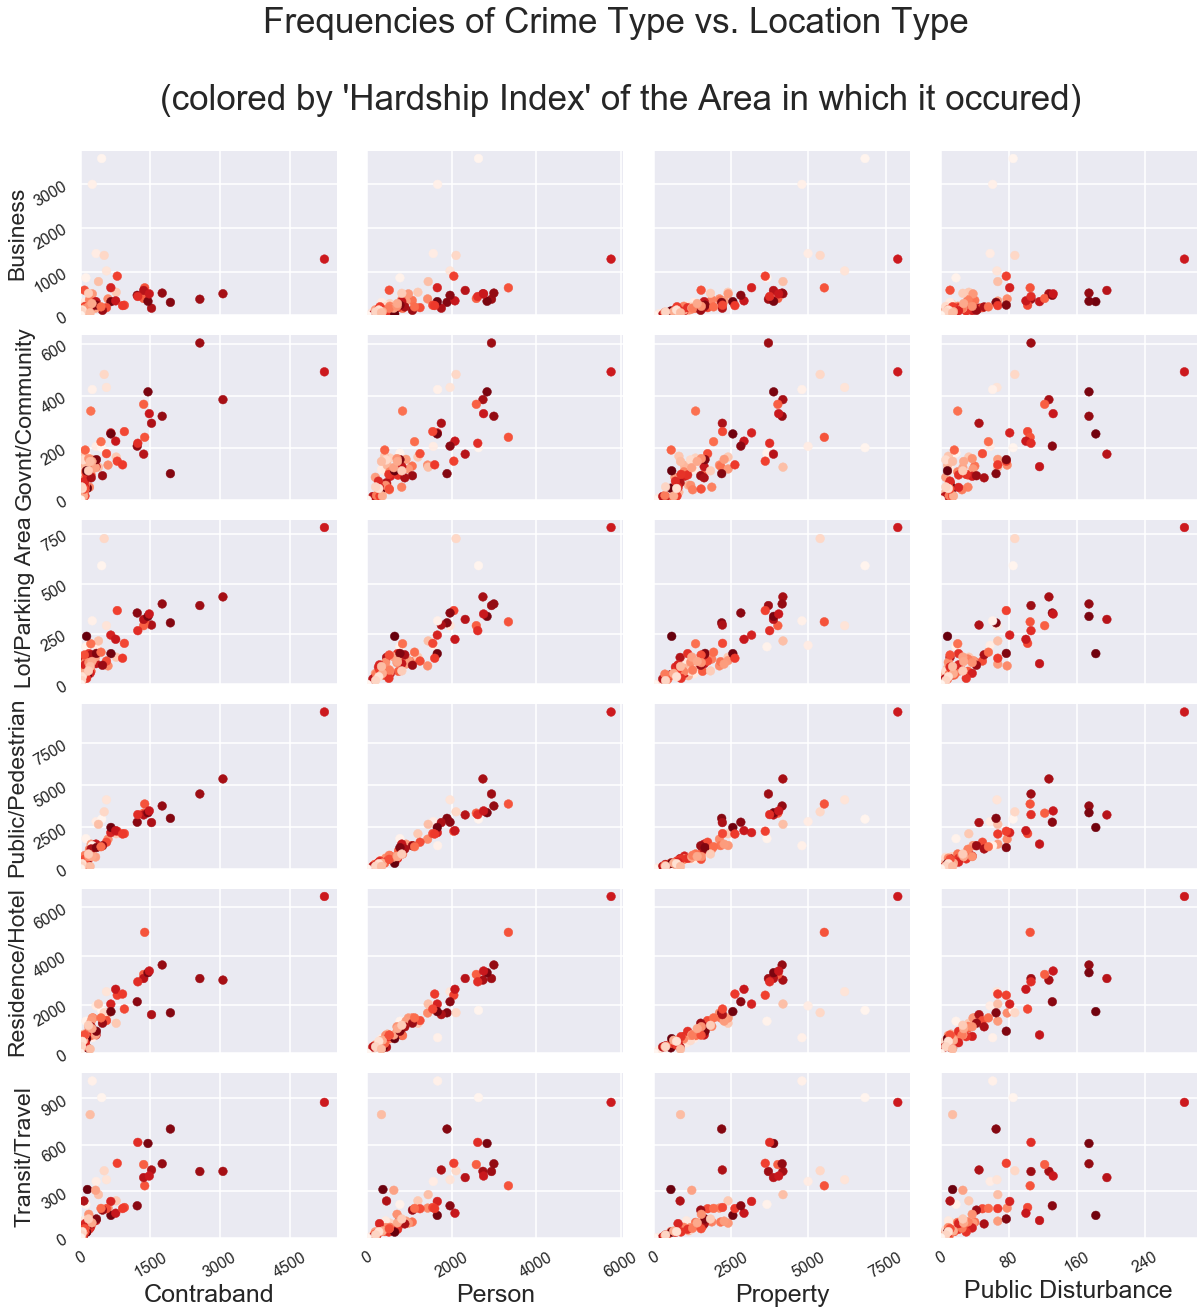

In [33]:
crimes = cc_Crime.columns.values[9:13]
loc = cc_Crime.columns.values[13:]

from matplotlib.ticker import MaxNLocator

sns.set_context('poster')

fig, axes = plt.subplots(6, 4, figsize=(20, 20), sharex='col', sharey='row',
                        gridspec_kw={'hspace':0.12, 'wspace':0.12}, )

for i in np.arange(13,19,1): # locations, y axis, 6  -- but axes appear to be labeled backwards...?
    for j in np.arange(9,13,1): #crimes, x axis, 4
#        print('axes: (', i-13, j-9, '): j = ', j, cc_Crime.columns.values[i], ', i = ', i, cc_Crime.columns.values[j])
        axes[i-13,j-9].scatter(x= cc_Crime.ix[:,j], y= cc_Crime.ix[:,i], s = 75, 
                               c = cc_Crime['HARDSHIP INDEX'],
                               #c = cc_Crime['PERCENT HOUSEHOLDS BELOW POVERTY'],
                               cmap = 'Reds')
        axes[i-13,j-9].xaxis.set_major_locator(MaxNLocator(4))
        axes[i-13,j-9].yaxis.set_major_locator(MaxNLocator(4))
        axes[i-13,j-9].set_xlim(left=0)
        axes[i-13,j-9].set_ylim(bottom=0)
            
        for label in axes[i-13, j-9].get_xticklabels():
            label.set_rotation(30)           
        for label in axes[i-13, j-9].get_yticklabels():
            label.set_rotation(30)
        if (j-9 == 0):
            axes[i-13,j-9].get_yaxis().set_label_text(cc_Crime.columns.values[i], size = 23)
        if (i-13 == 5):
            axes[i-13, j-9].get_xaxis().set_label_text(cc_Crime.columns.values[j], size = 25)

plt.suptitle("Frequencies of Crime Type vs. Location Type \n\n(colored by 'Hardship Index' of the Area in which it occured)", size=35)
plt.show()

Well that's interesting... There appears to be an outlier that's much heaver in one or both categries for each plot, with a decently high hardship index. That begs the question of whether it's the same area each time.  Given how separated the point is from the rest of the observations, it should be fairly easy to identify which area or areas are involved simply by filtering our flipped data frame to only show observations with those higher values in the crime categories.

In [34]:
cc_Crime[(cc_Crime['Contraband']  > 4500) | (cc_Crime['Person']  > 4000) | (cc_Crime['Property']  > 7500) |\
        (cc_Crime['Public Disturbance']  > 4500)]

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Contraband,Person,Property,Public Disturbance,Business,Govnt/Community,Lot/Parking Area,Public/Pedestrian,Residence/Hotel,Transit/Travel
24,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,5252.0,5775.0,7895.0,286.0,1284.0,493.0,780.0,9345.0,6432.0,874.0


Based on the data we have, Austin appears to outstep all other community areas in terms of the sheer numbers of crimes committed. A quick sort of our dataframe confirms this, showing that Austin outstrips the next highest area of crime by almost 9k observations.

In [35]:
cc_Crime['sum_crimes'] = cc_Crime.ix[:,9:13].sum(axis = 1)
high_crime = cc_Crime.sort_values('sum_crimes', ascending=False)
high_crime.head()
high_crime.ix[:3,[1,19]].head()

C:\Users\kguy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,COMMUNITY AREA NAME,sum_crimes
24,Austin,19208.0
42,South Shore,10343.0
22,Humboldt park,10106.0
7,Near North Side,10006.0
28,North Lawndale,9322.0


Another interesting thing from the grid plot above is the strong linear assocaition between the following attributes:

* Contraband in public/pedestrian areas
* Crimes against people in public/pedestrian areas
* Crimes against people in residences/hotels

There also appears to be a great deal of noise in areas such as government/schools/community buildings across all categories, and an ineresting flip in the trend of hardship index along the plots related to property, implying that property damage is one the more likely types of crimes in those areas.

#### Conclusion

This is a very intersting datset with some unique challenges (as well as opportunities) based on how it is organized. We can walk away from this analysis with a firm sense of which community area characteristics appear to have been most tightly associated with frequency of crimes, as well as confirmation on which area seemed to experience the highest rate of crime across all categories. We've successfully debunked my theory that income of an area is the strongest attribute associated with crime, as well as the assumption that lower education and higher crime are strongly associated. 

As with most datasets, there are more opportunities to dig into here. All findings seem to lead to more questions. Is there a disparity regarding crime outcomes between domestic and nondomestic crimes? How does that interplay with some of these community area attributes? And we haven't even begun to touch on some of the weather and transit variables. 

Chicago is doing a great service by publicizing data such as these. It affords immense opportunity for exploration and discovery. It doesn't hurt that it can debunk a few stereotypes along the way.